## Question:

Suppose a power plant starts in the "Startup" state today. After 5 days of
operation, what is the probability that it will be in the "Maintenance" state?

Transition Matrix:
0.20 0.70 0.05 0.05
0.10 0.80 0.05 0.05
0.20 0.20 0.50 0.10
0.30 0.10 0.20 0.40
Initial State Matrix:
[1. 0. 0. 0.]
Probability of being in 'Startup' after 5 cycles: 0.1409
Probability of being in 'Normal Operation' after 5 cycles: 0.6654
Probability of being in 'Maintenance' after 5 cycles: 0.1097
Probability of being in 'Shutdown' after 5 cycles: 0.0841


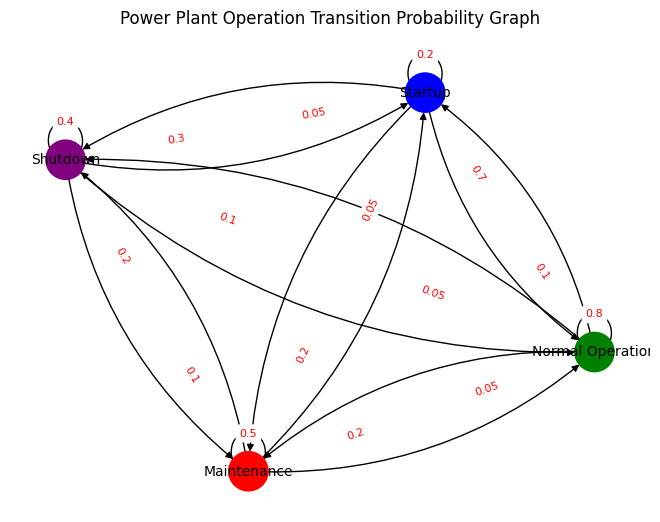

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define the states and transition probabilities for a power plant operation scenario
states = ['Startup', 'Normal Operation', 'Maintenance', 'Shutdown']

# Define the transition probabilities as a dictionary of dictionaries
transitions = {
    'Startup': {'Startup': 0.2, 'Normal Operation': 0.7, 'Maintenance': 0.05, 'Shutdown': 0.05},
    'Normal Operation': {'Startup': 0.1, 'Normal Operation': 0.8, 'Maintenance': 0.05, 'Shutdown': 0.05},
    'Maintenance': {'Startup': 0.2, 'Normal Operation': 0.2, 'Maintenance': 0.5, 'Shutdown': 0.1},
    'Shutdown': {'Startup': 0.3, 'Normal Operation': 0.1, 'Maintenance': 0.2, 'Shutdown': 0.4}
}

# Create a transition matrix
transition_matrix = np.array([[transitions[from_state].get(to_state, 0.0) for to_state in states] for from_state in states])

# Print the transition matrix
print("Transition Matrix:")
for from_state in states:
    row = []
    for to_state in states:
        probability = transitions.get(from_state, {}).get(to_state, 0.0)
        row.append(f"{probability:.2f}")
    print(" ".join(row))

# Number of operation cycles (days)
num_cycles = 5

# Define the initial state (e.g., starting in 'Startup' today)
initial_state = 'Startup'
initial_state_index = states.index(initial_state)
initial_state_vector = np.zeros(len(states))
initial_state_vector[initial_state_index] = 1

# Print the initial state matrix
print("Initial State Matrix:")
print(initial_state_vector)

# Calculate the state probabilities after five operation cycles
result_matrix = np.linalg.matrix_power(transition_matrix, num_cycles)
final_state_vector = np.dot(initial_state_vector, result_matrix)

# Get the probabilities of each state after 5 cycles
probabilities_after_cycles = {states[i]: final_state_vector[i] for i in range(len(states))}

# Print the probabilities after 5 operation cycles
for state, probability in probabilities_after_cycles.items():
    print(f"Probability of being in '{state}' after {num_cycles} cycles: {probability:.4f}")

# Define a dictionary to map each state to a specific color
node_colors = {
    'Startup': 'blue',
    'Normal Operation': 'green',
    'Maintenance': 'red',
    'Shutdown': 'purple'
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph with labels and updated colors
for state in states:
    G.add_node(state, color=node_colors[state])

# Add edges to the graph with weights (separate arrows for each direction)
for i in range(len(states)):
    for j in range(len(states)):
        weight = transitions[states[i]].get(states[j], 0.0)
        if weight > 0:
            G.add_edge(states[i], states[j], weight=weight)

# Plot the graph with updated node colors and arrows
pos = nx.spring_layout(G, seed=42)
node_colors_list = [node_colors[state] for state in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=800, node_color=node_colors_list, font_size=10, connectionstyle="arc3,rad=0.2", arrows=True)

# Draw labels for edge weights
edge_labels = {(edge[0], edge[1]): G[edge[0]][edge[1]]['weight'] for edge in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red', label_pos=0.3)

plt.title("Power Plant Operation Transition Probability Graph")
plt.show()
